<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

# Шаг 1. Откройте файл с данными и изучите общую информацию


<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Надо обязательно прикреплять описание проекта, иначе не понятно в чём суть вообще твоей работы

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [339]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [340]:
tariffs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [341]:

    #Сразу же переименуем колонку с названием тарифа, чтобы в дальнейшем у нас была возможность применить merge по ней.
    

tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [342]:
tariffs


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [343]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

In [344]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [345]:
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [346]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [347]:
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [348]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [349]:
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [350]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Молодец, что провёл первичный анализ полученных данных, это всегда быстро помогает понять с чем предстоит работать, по выводам нареканий нет - всё верно и точно
</div>

# Шаг 2. Подготовьте данные


In [351]:
calls['duration'] = calls['duration'].apply(np.ceil)
NZ = calls['duration'] > 0
calls['duration'].where(NZ, 1, inplace=True)

 - применил метод np.ceil для признака, тем самым получив верхнее значение в минутах;
 - заменил нули на 1 – минимальное значение сессии звонка для оператора. (по хорошему нужно сходить к коллегам и уточнить что с выгрузкой)

In [352]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
NZI = internet['mb_used'] > 0
internet['mb_used'].where(NZI, 1, inplace=True)

- применим метод np.ceil для признака, тем самым получив верхнее значение в минутах;
- заменим нули на 1 – минимальное значение сессии.

In [353]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')


Преобразуем тип данных даты, чтоб в последующем извлечь месяц из даты

In [354]:
calls['duration'] = calls['duration'].astype('int64')
internet['mb_used'] = internet['mb_used'].astype('int64')

In [355]:
total = pd.DataFrame()

Создадим пустой ДатаФрейм

In [356]:
calls['month'] = calls['call_date'].dt.month

In [357]:
calls_by_month = calls.pivot_table(
    index=['month', 'user_id'],
    values='duration',
    aggfunc=['count', 'sum']
)

In [358]:
calls_by_month

count      sum
              duration duration
month user_id                  
1     1005          15       99
      1032          61      397
      1045           1        9
      1055          64      568
      1071          24      200
...                ...      ...
12    1494          62      426
      1495         155     1066
      1496          80      533
      1497          71      558
      1499          69      505

[3174 rows x 2 columns]

In [359]:
tmp_df = pd.DataFrame(calls_by_month.to_records())


In [360]:
total['user_id'] = tmp_df['user_id']
total['month']   = tmp_df['month']
total['calls']   = tmp_df.iloc[:, 2]
total['minutes'] = tmp_df.iloc[:, 3]

In [361]:
total

,user_id,month,calls,minutes
0,1005,1,15,99
1,1032,1,61,397
2,1045,1,1,9
3,1055,1,64,568
4,1071,1,24,200
...,...,...,...,...
3169,1494,12,62,426
3170,1495,12,155,1066
3171,1496,12,80,533
3172,1497,12,71,558


In [362]:
messages['month'] = messages['message_date'].dt.month


In [363]:
messages_by_month = messages.pivot_table(
    index=['month', 'user_id'],
    values='id',
    aggfunc='count'
)

In [364]:
messages_by_month

id
month user_id    
1     1005      7
      1032     38
      1045      5
      1055     30
      1071     16
...            ..
12    1493     78
      1495     84
      1496     51
      1497     17
      1499     66

[2717 rows x 1 columns]

In [365]:
tmp_df = pd.DataFrame(messages_by_month.to_records()).rename(columns={'id': 'messages'})


In [366]:
tmp_df

,month,user_id,messages
0,1,1005,7
1,1,1032,38
2,1,1045,5
3,1,1055,30
4,1,1071,16
...,...,...,...
2712,12,1493,78
2713,12,1495,84
2714,12,1496,51
2715,12,1497,17


In [367]:
total = total.merge(tmp_df, on=['user_id', 'month'], how='outer')


In [368]:
total

,user_id,month,calls,minutes,messages
0,1005,1,15.0,99.0,7.0
1,1032,1,61.0,397.0,38.0
2,1045,1,1.0,9.0,5.0
3,1055,1,64.0,568.0,30.0
4,1071,1,24.0,200.0,16.0
...,...,...,...,...,...
3208,1106,12,NaN,NaN,24.0
3209,1231,12,NaN,NaN,191.0
3210,1328,12,NaN,NaN,7.0
3211,1473,12,NaN,NaN,20.0


In [369]:
internet['month'] = internet['session_date'].dt.month


In [370]:
internet_by_month = internet.pivot_table(
    index=['month', 'user_id'],
    values='mb_used',
    aggfunc='sum'
)

In [371]:
internet_by_month

mb_used
month user_id         
1     1005        2730
      1032       24158
      1045        2348
      1055       17115
      1071       15625
...                ...
12    1494       17650
      1495       23451
      1496       20770
      1497       19946
      1499       13082

[3203 rows x 1 columns]

In [372]:
tmp_df = pd.DataFrame(internet_by_month.to_records())


In [373]:
total = total.merge(tmp_df, on=['user_id', 'month'], how='outer')


In [374]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3174 non-null float64
minutes     3174 non-null float64
messages    2717 non-null float64
mb_used     3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


После формирования датафрейма по месяцам появились пропуски. Такое ощущение, что некоторые пользователи в некоторые месяцы пользовались не всеми услугами. Например, кто-то только мобильным интернетом. Заполним пропуски нулями и позже посмотрим на распределение.

In [375]:
na = ['calls', 'minutes', 'messages']

for f in na:
    # При соединении датафреймов Pandas привел типы к float64 из-за пропусков,
    # поэтому явно приведем их к int64
    total[f] = total[f].fillna(0).astype('int64')

In [376]:
total.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id     3214 non-null int64
month       3214 non-null int64
calls       3214 non-null int64
minutes     3214 non-null int64
messages    3214 non-null int64
mb_used     3203 non-null float64
dtypes: float64(1), int64(5)
memory usage: 175.8 KB


In [377]:
total.head()


,user_id,month,calls,minutes,messages,mb_used
0,1005,1,15,99,7,2730.0
1,1032,1,61,397,38,24158.0
2,1045,1,1,9,5,2348.0
3,1055,1,64,568,30,17115.0
4,1071,1,24,200,16,15625.0


In [378]:
total = total.merge(users, on='user_id', how='left').merge(tariffs, on='tariff', how='left')


In [379]:
total['minutes_over']  = total['minutes'] - total['minutes_included']
total['messages_over'] = total['messages'] - total['messages_included']
total['mb_used_over']  = total['mb_used'] - total['mb_per_month_included']

In [380]:
total.head()


,user_id,month,calls,minutes,messages,mb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_over,messages_over,mb_used_over
0,1005,1,15,99,7,2730.0,67,NaN,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,-401,-43,-12630.0
1,1032,1,61,397,38,24158.0,31,NaN,Ульяновск,Инна,...,50,15360,500,550,200,3,3,-103,-12,8798.0
2,1045,1,1,9,5,2348.0,48,NaN,Улан-Удэ,Джемма,...,50,15360,500,550,200,3,3,-491,-45,-13012.0
3,1055,1,64,568,30,17115.0,39,NaN,Казань,Луиза,...,50,15360,500,550,200,3,3,68,-20,1755.0
4,1071,1,24,200,16,15625.0,20,2018-08-31,Омск,Гектор,...,50,15360,500,550,200,3,3,-300,-34,265.0


Положительные значения указывают на перерасход. Отрицательные на остаток в рамках тарифа.



In [381]:
def calc_monthly_revenue(row):
    
    
    minutes_price = 0
    messages_price = 0
    mb_used_price = 0
    
    # стоимость дополнительных минут
    if row['minutes_over'] > 0:
        minutes_price = row['minutes_over'] * row['rub_per_minute']

    # стоимость дополнительных сообщений
    if row['messages_over'] > 0:
        messages_price = row['messages_over'] * row['rub_per_message']

    # стоимость дополнительного трафика
    if row['mb_used_over'] > 0:
        mb_used_price = (row['mb_used_over'] / 1024) * row['rub_per_gb']
    
    return minutes_price + messages_price + mb_used_price

In [382]:
total['rub_monthly_fee_over'] = total.apply(calc_monthly_revenue, axis=1)
total['rub_monthly_fee_total'] = total['rub_monthly_fee'] + total['rub_monthly_fee_over']

In [383]:
total = pd.DataFrame(
    total[['month', 'tariff', 'user_id', 'city',
           'calls', 'minutes', 'messages', 'mb_used',
           'minutes_over', 'messages_over', 'mb_used_over',
           'rub_monthly_fee_over', 'rub_monthly_fee_total']]
)

Избавились от промежуточных расчетных колонок

In [384]:
total.head()

,month,tariff,user_id,city,calls,minutes,messages,mb_used,minutes_over,messages_over,mb_used_over,rub_monthly_fee_over,rub_monthly_fee_total
0,1,smart,1005,Набережные Челны,15,99,7,2730.0,-401,-43,-12630.0,0.000000,550.000000
1,1,smart,1032,Ульяновск,61,397,38,24158.0,-103,-12,8798.0,1718.359375,2268.359375
2,1,smart,1045,Улан-Удэ,1,9,5,2348.0,-491,-45,-13012.0,0.000000,550.000000
3,1,smart,1055,Казань,64,568,30,17115.0,68,-20,1755.0,546.773438,1096.773438
4,1,smart,1071,Омск,24,200,16,15625.0,-300,-34,265.0,51.757812,601.757812


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Этап предобработки закончен, со всеми действиями и выводами согласен, замечательно. Так же порадовало что всё делишь на отдельные ячейки и пишешь выводы, можно приступать к основной части анализа</div>

# Шаг 3. Проанализируйте данные

In [391]:
values = ['minutes', 'messages', 'mb_used', 'rub_monthly_fee_over', 'rub_monthly_fee_total']


In [395]:
tariff_monthly_costs = total.pivot_table(
    index=['tariff', 'month'],
    values=values
)

In [396]:
tariff_monthly_costs

mb_used   messages     minutes  rub_monthly_fee_over  \
tariff month                                                              
smart  1       8528.588235  18.235294  209.647059            154.895910   
       2      11617.344828  24.086207  306.310345            262.159752   
       3      15131.207792  31.857143  400.532468            583.213271   
       4      13486.080357  30.741071  377.000000            384.781878   
       5      15832.751773  33.773050  398.404255            611.004377   
       6      15822.445122  33.402439  406.701220            614.601038   
       7      15771.398010  33.751244  419.288557            635.629392   
       8      16711.324786  33.638298  433.191489            726.647008   
       9      16332.615385  33.638462  440.080769            667.753456   
       10     16786.853741  33.765306  438.295918            773.870669   
       11     16925.962025  34.075949  447.620253            754.095703   
       12     18145.824926  35.994065  491.418398            979.434927   
ultra  1      13154.666667  33.777778  440.888889              0.000000   
       2      12860.000000  21.958333  304.666667             23.095703   
       3      17553.513514  32.297297  503.081081             54.254645   
       4      16845.254545  31.563636  470.072727             45.474077   
       5      19676.878788  37.850746  524.865672            105.022738   
       6      19172.168675  41.726190  492.428571             82.109724   
       7      20744.533333  49.846154  560.296703            158.562092   
       8      19780.745283  48.439252  524.570093            121.230195   
       9      19392.675439  52.286957  553.643478             63.776749   
       10     20230.008197  58.430894  572.829268            106.975276   
       11     19956.052632  55.791045  555.805970            130.850994   
       12     21973.768116  60.611511  609.129496            176.322926   

              rub_monthly_fee_total  
tariff month                         
smart  1                 704.895910  
       2                 812.159752  
       3                1133.213271  
       4                 934.781878  
       5                1161.004377  
       6                1164.601038  
       7                1185.629392  
       8                1276.647008  
       9                1217.753456  
       10               1323.870669  
       11               1304.095703  
       12               1529.434927  
ultra  1                1950.000000  
       2                1973.095703  
       3                2004.254645  
       4                1995.474077  
       5                2055.022738  
       6                2032.109724  
       7                2108.562092  
       8                2071.230195  
       9                2013.776749  
       10               2056.975276  
       11               2080.850994  
       12               2126.322926

In [397]:
smart_monthly_costs = tariff_monthly_costs.loc['smart']
smart_monthly_costs

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,8528.588235,18.235294,209.647059,154.895910,704.895910
2,11617.344828,24.086207,306.310345,262.159752,812.159752
3,15131.207792,31.857143,400.532468,583.213271,1133.213271
4,13486.080357,30.741071,377.000000,384.781878,934.781878
5,15832.751773,33.773050,398.404255,611.004377,1161.004377
6,15822.445122,33.402439,406.701220,614.601038,1164.601038
7,15771.398010,33.751244,419.288557,635.629392,1185.629392
8,16711.324786,33.638298,433.191489,726.647008,1276.647008
9,16332.615385,33.638462,440.080769,667.753456,1217.753456


In [398]:
ultra_monthly_costs = tariff_monthly_costs.loc['ultra']
ultra_monthly_costs

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
month,,,,,
1,13154.666667,33.777778,440.888889,0.000000,1950.000000
2,12860.000000,21.958333,304.666667,23.095703,1973.095703
3,17553.513514,32.297297,503.081081,54.254645,2004.254645
4,16845.254545,31.563636,470.072727,45.474077,1995.474077
5,19676.878788,37.850746,524.865672,105.022738,2055.022738
6,19172.168675,41.726190,492.428571,82.109724,2032.109724
7,20744.533333,49.846154,560.296703,158.562092,2108.562092
8,19780.745283,48.439252,524.570093,121.230195,2071.230195
9,19392.675439,52.286957,553.643478,63.776749,2013.776749


In [399]:
tariff_usage = tariff_monthly_costs.pivot_table(
    index='tariff',
    values=values
)
tariff_usage

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
tariff,,,,,
smart,15091.033082,31.413211,397.374228,595.673948,1145.673948
ultra,18445.022099,43.714983,509.356551,88.972927,2038.972927


Минуты разговора, количество сообщений и объём интернет-трафика в среднем необходимые пользователям каждого тарифа в месяц


### Вывод
-  Пользователи тарифа Ультра более активны
-  пользователи тарифа Смарт тратят в среднем в 6 раз больше на дополнительные пакеты услуг. 
-  Оператору больше денег приносит тариф Ультра, даже с учетом того, что в среднем пользователи не выходят за границы тарифных лимитов, а пользователи тарифа Смарт не тратят столько денег, чтобы перегнать стоимость тарифа Ультра.
- Таким образом, для пользователя выгоднее тариф Смарт

In [400]:
moscow = total['city'] == 'Москва'
total['city'].where(moscow, 'Другой регион', inplace=True)

city_monthly_costs = total.pivot_table(
    index=['city', 'month'],
    values=values
)

In [402]:
city_usage = city_monthly_costs.pivot_table(
    index='city',
    values=values
)
city_usage

,mb_used,messages,minutes,rub_monthly_fee_over,rub_monthly_fee_total
city,,,,,
Другой регион,15758.440143,35.268458,424.594742,451.974045,1398.514093
Москва,17603.175813,33.944639,455.792652,388.889460,1483.854730


### Вывод
- По средним значениям выручки пользователей Москвы и регионов мы видим, что разница не весомая.
- Кол-во использованных минут и смс не практически не отличается
- В Москве чуть больше потребляют трафика – ожидаемо с учетом покрытия и скорости

In [405]:
smart_costs = total.query("tariff == 'smart'")


In [406]:
smart_costs['minutes'].describe()


count    2229.000000
mean      429.450875
std       194.871174
min         0.000000
25%       291.000000
50%       435.000000
75%       560.000000
max      1471.000000
Name: minutes, dtype: float64

In [408]:
ultra_costs = total.query("tariff == 'ultra'")


In [409]:
ultra_costs['minutes'].describe()


count     985.000000
mean      540.779695
std       325.738740
min         0.000000
25%       292.000000
50%       532.000000
75%       773.000000
max      1727.000000
Name: minutes, dtype: float64

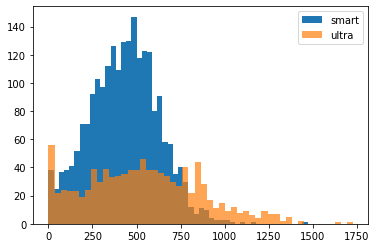

In [414]:
plt.hist(smart_costs['minutes'], bins=50, label='smart')
plt.hist(ultra_costs['minutes'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

не забывай подписывать оси на графиках и указывать название для графика

In [1]:
<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

не забывай подписывать оси на графиках и указывать название для графикаsmv = np.var(smart_costs['minutes'], ddof=1)
umv = np.var(ultra_costs['minutes'], ddof=1)

SyntaxError: invalid syntax (<ipython-input-1-7e68eda0d2a7>, line 1)

In [423]:
smv

37974.774627825

In [424]:
umv

106105.72682307787

### Звонки

- Смарт станд. отклонение 194.871174  дисперсия 37974.774627825
- Ультра стандю отклонение 325.738740 дисперсия 106105.72682307787

In [425]:
smart_costs['messages'].describe()


count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages, dtype: float64

In [426]:
ultra_costs['messages'].describe()


count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages, dtype: float64

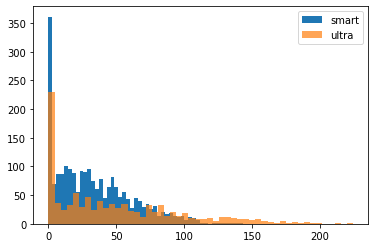

In [427]:
plt.hist(smart_costs['messages'], bins=50, label='smart')
plt.hist(ultra_costs['messages'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Графики точно нужно строить детальнее, иначе так из графика не понятно, что изображено, если не залазить в код, а заказчики в будущем точно не будут копать в коде, чтобы понять, что перед ними изображено

In [428]:
<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Графики точно нужно строить детальнее, иначе так из графика не понятно, что изображено, если не залазить в код, а заказчики в будущем точно не будут копать в коде, чтобы понять, что перед ними изображеноssv = np.var(smart_costs['messages'], ddof=1)
usv = np.var(ultra_costs['messages'], ddof=1)

In [429]:
ssv

796.8129584480083

In [430]:
usv

2285.266142544674

### СМС

- Смарт станд. отклонение 28.227876  дисперсия 796.8129584480083
- Ультра стандю отклонение 47.804457 дисперсия 2285.266142544674


In [431]:
smart_costs['mb_used'].describe()


count     2228.000000
mean     16244.472172
std       5871.037024
min          1.000000
25%      12673.250000
50%      16541.500000
75%      20078.750000
max      38627.000000
Name: mb_used, dtype: float64

In [432]:
ultra_costs['mb_used'].describe()


count      975.000000
mean     19688.587692
std       9952.830482
min          1.000000
25%      12022.000000
50%      19416.000000
75%      26921.500000
max      49793.000000
Name: mb_used, dtype: float64

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


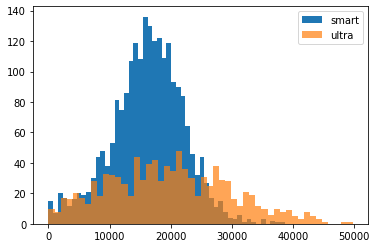

In [433]:
plt.hist(smart_costs['mb_used'], bins=50, label='smart')
plt.hist(ultra_costs['mb_used'], bins=50, label='ultra', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

In [434]:
siv = np.var(smart_costs['mb_used'], ddof=1)
uiv = np.var(ultra_costs['mb_used'], ddof=1)

In [435]:
siv

34469075.73833619

In [436]:
uiv

99058834.60600853

### Интернет
- Смарт станд. отклонение (Мб) 5871.037024 дисперсия 34469075.73833619
- Ультра стандю отклонение (Мб) 9952.830482 дисперсия 99058834.60600853

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Тут всё абсолютно верно, верные выводы, но стоило бы строить больше разнообразных визуализаций, это будет очень важным навыком , который точно пригодится тебе в будущем, так как в любой аналитике графики являются наглядным подтверждением твоих выводов

# Шаг 4. Проверьте гипотезы


Мы рассматриваем две генеральные сопокупности – пользователей разных тарифов мобильного оператора. Проверим две (двусторонние) гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Чтобы понять, различается ли средняя выручка пользователей разных тарифов и населенных пунктов, значима ли разница между средними значениями, проведем статистические тесты.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

- Средняя выручка пользователя тарифа "Смарт": 1145 руб
- Средняя выручка пользователя тарифа "Ультра": 2038 руб

Нулевая гипотеза - Средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается

альтернативная гипотеза  - Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

In [437]:
alpha = .01

results = st.ttest_ind(
    smart_costs['rub_monthly_fee_total'], 
    ultra_costs['rub_monthly_fee_total'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.009674149482176e-180
Отвергаем нулевую гипотезу


Средняя выручка по тарифам не одинакова, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится. Следовательно, средняя выручка пользователей тарифов "Ультра" и "Смарт" действительно различается и наша гипотеза подтвердилась

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- Средняя выручка пользователей из Москвы: 1483 руб
- Средняя выручка пользователей из других регионов: 1398 руб

Нулевая гипотеза - Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
альтернативная гипотеза  - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


In [442]:
alpha = .05

moscow = total.query("city == 'Москва'")['rub_monthly_fee_total']
other_cities = total.query("city == 'Другой регион'")['rub_monthly_fee_total']

results = st.ttest_ind(moscow, other_cities)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5220687323801865
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и регионов неодинакова, с вероятностью в почти 52% такое различие можно получить случайно. Как мы уже знаем, это слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками. Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, и наша гипотеза не подтвердилась.



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Гипотезы проверены, молодец!)

# Шаг 5. Напишите общий вывод


 Потвердилась только первая гипотеза Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

Более выгоднай тариф:
- для оператора Ультра
- для пользователя Смарт

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

В выводах стоит отражать все полученные результаты и желательно так же приводить цифры, полученные в ходе выполнения проекта

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Ты проделал отличную работу и я очень рад, что у тебя всё получается!) Надеюсь так будет и в будущем и ты останешься полностью доволен данным курсом!) Удачи тебе в следующих проектах)